In [88]:
import pandas as pd
import os
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [89]:
NEURAL_NETWORKS = ['GradientBoosting', 'KNN', 'NBayes', "RandomForest"] #['DenseNet201', 'MobileNetV2', 'InceptionV3', "ResNet50"]
pre_name = "ml"
path_project = Path().absolute().parent.parent.parent
results_path = path_project / "6_resultados"


In [90]:
main_pd = pd.DataFrame()
pds = []
for network in NEURAL_NETWORKS:
    output_file = results_path / 'analitycs' / 'by_train' / '_pre_plot' / f'{network}_result_for_analytic.csv'
    readed = pd.read_csv(output_file)
    pds.append(readed)

main_pd = pd.concat(pds)

In [91]:
def makedatFile(network, attribute, x, y):
  f = open(results_path / 'analitycs' / 'by_train' / '_pre_plot' / 'dats' /f"{network}_{attribute}.dat", "w+")
  f.write("x F(x)\n")
  for i, axisx in enumerate(x):
     f.write(f"{axisx} {y[i]}\n")

In [92]:
main_pd

,subset,model,runtime,val_runtime,total_runtime,accuracy_mean,accuracy_median,accuracy_lower,accuracy_upper,accuracy_lower_whisker,...,val_npv_lower,val_npv_upper,val_npv_lower_whisker,val_npv_upper_whisker,val_mcc_mean,val_mcc_median,val_mcc_lower,val_mcc_upper,val_mcc_lower_whisker,val_mcc_upper_whisker
0,5,GradientBoosting,22.591440,22.668389,45.259830,87.365291,87.463312,86.916519,87.787570,85.609942,...,71.328626,78.774081,60.160443,89.942263,42.739448,44.055251,37.064478,48.961127,19.219506,66.806099
1,10,GradientBoosting,19.113613,19.195020,38.308632,91.279755,91.303445,90.780683,91.724349,89.365184,...,76.070849,83.172732,65.418024,93.825557,48.144815,49.813787,45.223582,53.605414,32.650834,66.178162
2,15,GradientBoosting,18.142051,18.229135,36.371186,93.114107,93.109174,92.697461,93.341735,91.731050,...,75.413630,83.244673,63.667065,94.991239,48.766536,51.711591,45.496515,55.045650,31.172813,69.369353
3,20,GradientBoosting,19.213813,19.304596,38.518409,94.230609,94.229971,93.926744,94.473292,93.106923,...,76.109151,83.925498,64.384631,95.650019,49.761772,51.860671,47.329743,54.259868,36.934556,64.655055
4,25,GradientBoosting,20.199222,20.290877,40.490099,94.950677,94.942626,94.646912,95.233266,93.767380,...,76.028985,84.607711,63.160895,97.475801,49.219826,52.814428,45.816724,55.310109,31.576648,69.550185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,80,RandomForest,143.996434,144.075145,288.071579,99.032212,99.036245,98.910895,99.150619,98.551310,...,73.801534,80.987773,63.022176,91.767131,45.953039,49.193770,45.245234,53.129128,33.419394,64.954969
16,85,RandomForest,152.357060,152.438001,304.795061,99.032472,99.032041,98.928903,99.135007,98.619747,...,73.409795,82.347733,60.002886,95.754641,47.199756,49.788481,44.106283,53.668384,29.763131,68.011536
17,90,RandomForest,160.549051,160.632209,321.181260,99.016336,99.032594,98.916885,99.115317,98.619237,...,75.000000,81.580675,65.128987,91.451689,47.090585,49.043702,45.000999,53.554459,32.170809,66.384649
18,95,RandomForest,166.617285,166.700275,333.317560,99.042611,99.040080,98.932977,99.122428,98.648801,...,75.617315,81.785027,66.365747,91.036595,45.927202,48.622456,44.650666,51.759265,33.987769,62.422162


In [93]:
# valores maximos e minos das acuracias
main_pd['accuracy_median'].max()
main_pd['accuracy_median'].min()

70.9852627232997

In [94]:

# Combinando todos os valores de ROIs
full_rois = np.unique(np.concatenate([main_pd['subset']]))
range_rois =  np.arange(5, 100, 10)


In [95]:
def plot_comparison(main_pd, attribute, title, xlabel, xticks, figsize=(10, 6), yticks=None):
    """
    Função para plotar comparações de um atributo específico entre diferentes arquiteturas de CNN.

    :param main_pd: DataFrame contendo todos os dados.
    :param attribute: Atributo a ser plotado (string).
    :param title: Título do gráfico.
    :param xlabel: Rótulo do eixo X.
    :param xticks: Marcas do eixo X.
    :param figsize: Tamanho da figura do gráfico.
    :param yticks: Marcas do eixo Y (opcional).

    obs:
    300+ dpi
    16px font
    export to pdf and plot
    """
    fig, ax = plt.subplots(figsize=figsize)
    sns.set(font_scale=1.5)
    sns.set_style("whitegrid")
    sns.set_palette("husl")
    for network in NEURAL_NETWORKS:
        network_data = main_pd[main_pd['model'] == network]
        x = network_data['subset']
        y = network_data[attribute]
        ax.plot(x, y, marker='o', linestyle='-', label=network)
        print(network)

    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(attribute.replace('_', ' ').capitalize())
    ax.set_xticks(xticks)
    if yticks is not None:
        ax.set_yticks(yticks)
    ax.legend()

    # make folder to save graphics
    if not os.path.exists(results_path / 'analitycs' / 'by_train' / 'graphics'):
        os.makedirs(results_path / 'analitycs' / 'by_train' / 'graphics')
    plt.savefig(results_path / 'analitycs' / 'by_train' / 'graphics' / f"{pre_name}_{attribute}.pdf", dpi=300)

    plt.show() 

GradientBoosting
KNN
NBayes
RandomForest


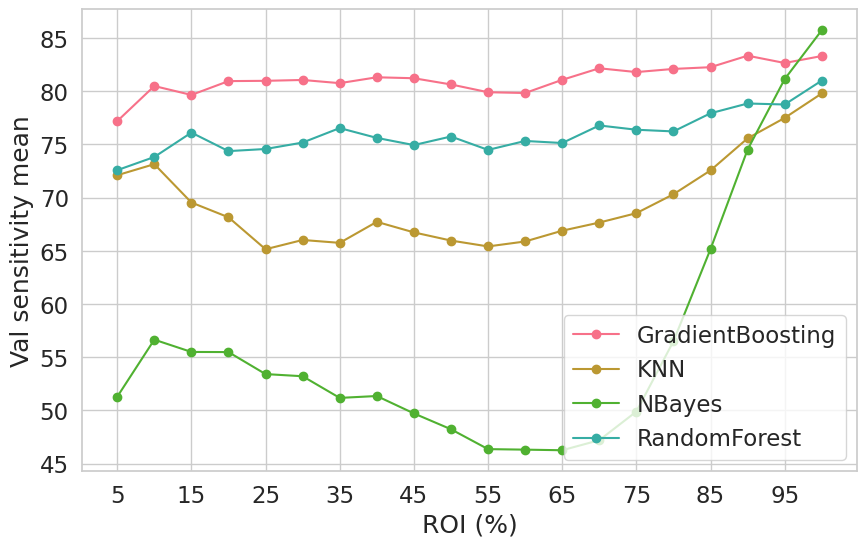

In [96]:
plot_comparison(main_pd, 'val_sensitivity_mean', '', 'ROI (%)', range_rois)

GradientBoosting
KNN
NBayes
RandomForest


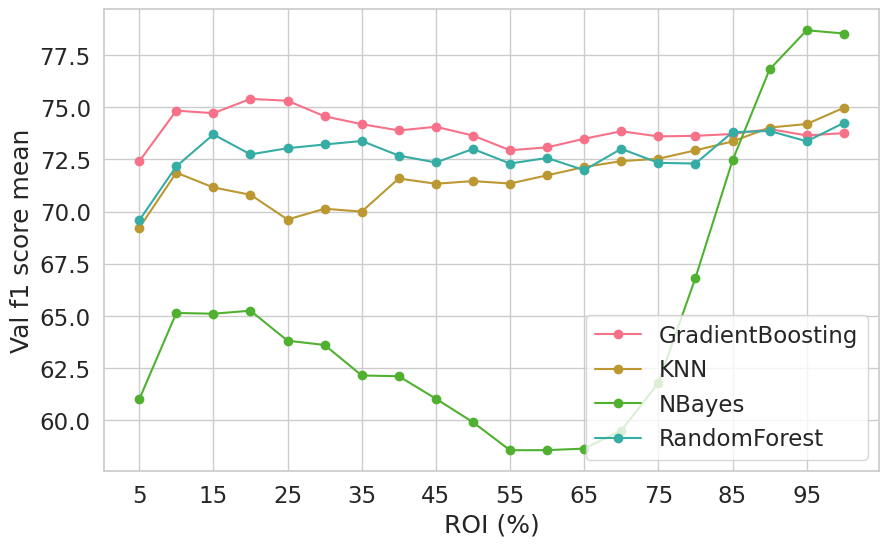

In [97]:
plot_comparison(main_pd, 'val_f1_score_mean', '', 'ROI (%)', range_rois)


GradientBoosting
KNN
NBayes
RandomForest


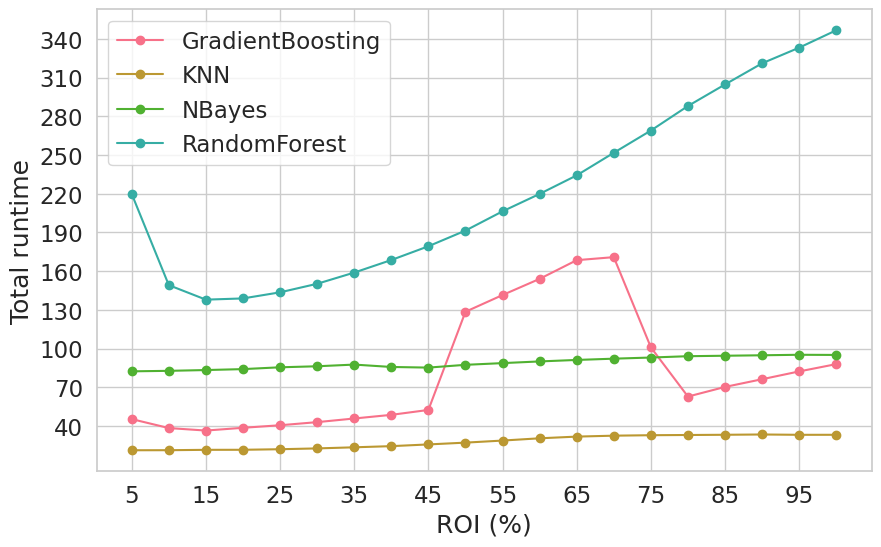

In [98]:
# Valores para os ticks do eixo Y
range_time = np.arange(40, 360, 30)

plot_comparison(main_pd, 'total_runtime', '', 'ROI (%)', range_rois, yticks=range_time)


GradientBoosting
KNN
NBayes
RandomForest


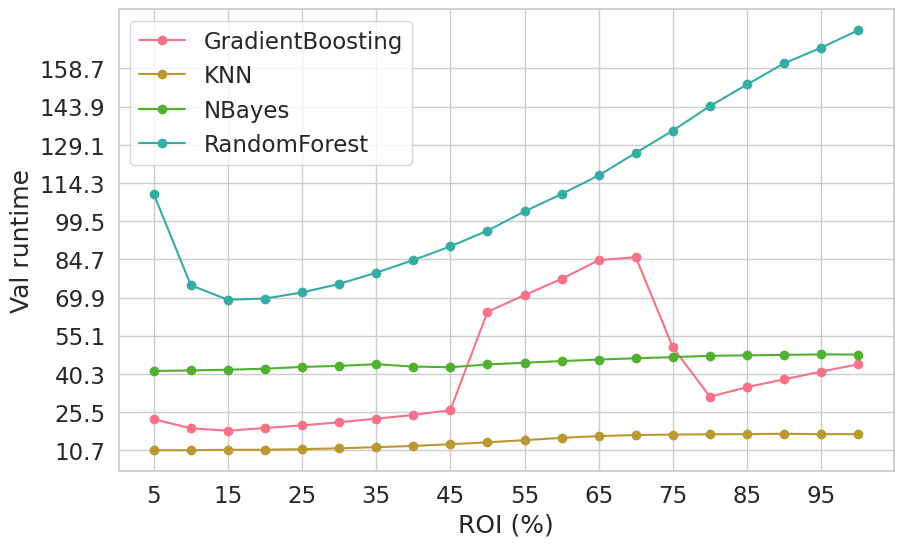

In [107]:
# Valores para os ticks do eixo Y ajustados para o tempo de validação

# get min and max values for validation time
max_val_time = main_pd['val_runtime'].max()
min_val_time = main_pd['val_runtime'].min()
# de forma que fique sejam 11 valores
step = (max_val_time - min_val_time) / 11
range_time_validation = np.arange(min_val_time, max_val_time, step)

plot_comparison(main_pd, 'val_runtime', '', 'ROI (%)', range_rois, yticks=range_time_validation)


GradientBoosting
KNN
NBayes
RandomForest


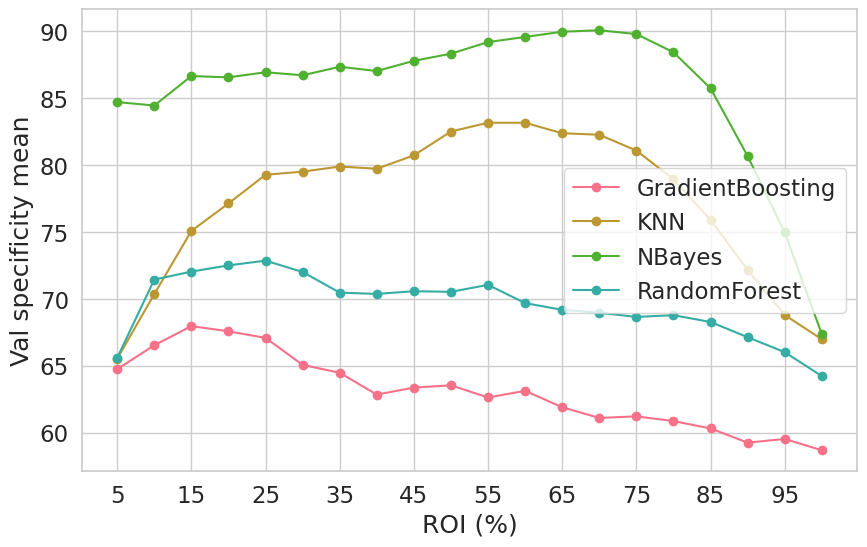

In [100]:

plot_comparison(main_pd, 'val_specificity_mean', '', 'ROI (%)', range_rois)


GradientBoosting
KNN
NBayes
RandomForest


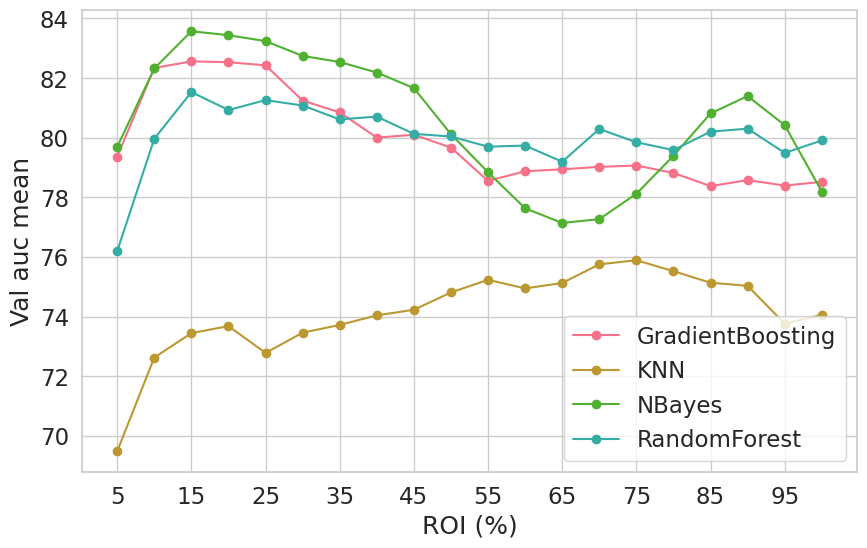

In [101]:
plot_comparison(main_pd, 'val_auc_mean', '', 'ROI (%)', range_rois)


GradientBoosting
KNN
NBayes
RandomForest


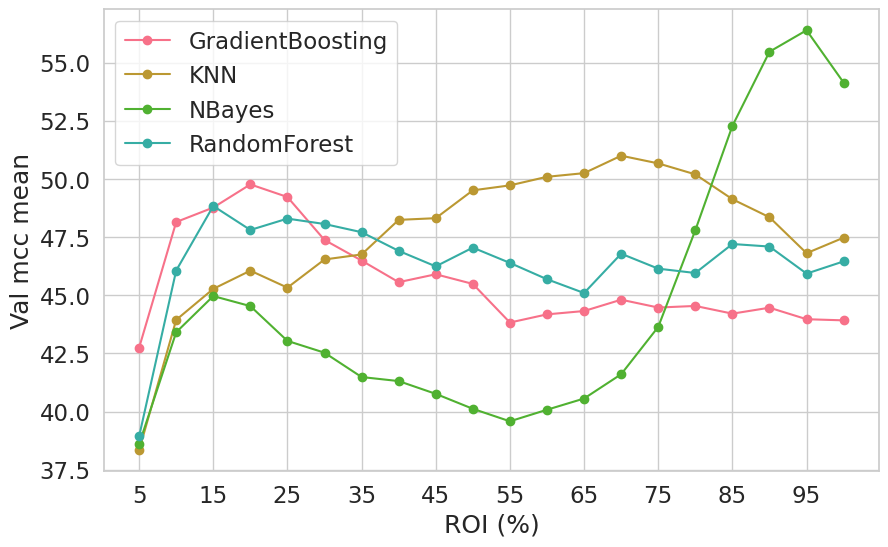

In [102]:
plot_comparison(main_pd, 'val_mcc_mean', '', 'ROI (%)', range_rois)


GradientBoosting
KNN
NBayes
RandomForest


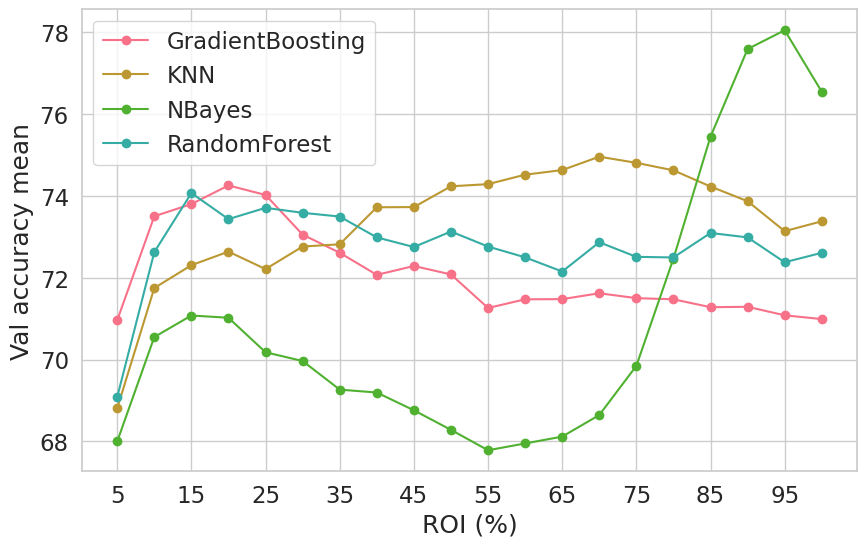

In [103]:
plot_comparison(main_pd, 'val_accuracy_mean', '', 'ROI (%)', range_rois)

GradientBoosting
KNN
NBayes
RandomForest


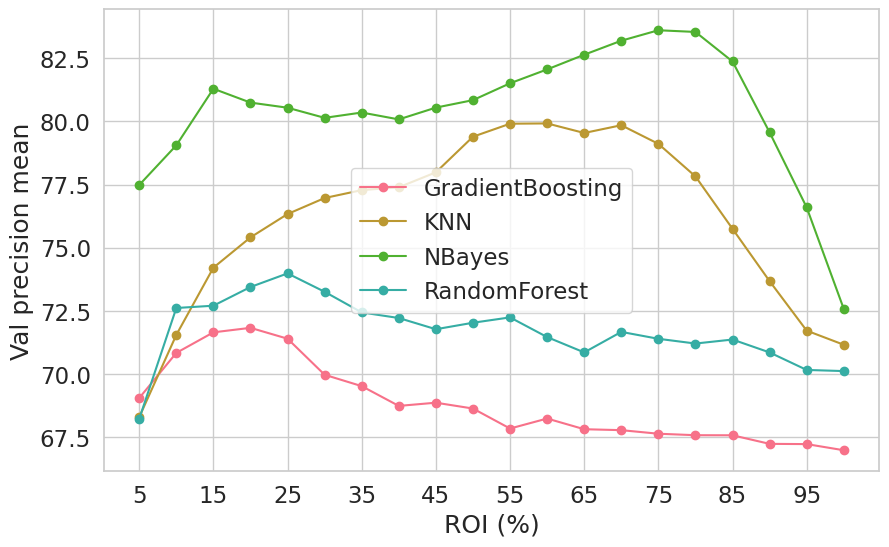

In [104]:
plot_comparison(main_pd, 'val_precision_mean', '', 'ROI (%)', range_rois)